In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [18]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/john_horgan.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416485281193086978,1416485281193086976,2021-07-18 01:19:42 India Standard Time,2021-07-18,01:19:42,530,232427887,jjhorgan,John Horgan,,...,,,,,,[],,,,
1,1416173298459754499,1416173298459754496,2021-07-17 04:40:00 India Standard Time,2021-07-17,04:40:00,530,232427887,jjhorgan,John Horgan,,...,,,,,,[],,,,
2,1416150525289115658,1416150525289115648,2021-07-17 03:09:30 India Standard Time,2021-07-17,03:09:30,530,232427887,jjhorgan,John Horgan,,...,,,,,,[],,,,


In [19]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Due', 'to', 'the', 'extreme', 'risk', 'of', 'wildfires,', 'there', 'is', 'a', 'campfire', 'ban', 'in', 'place.', 'Failing', 'to', 'follow', 'this', 'ban', 'can', 'lead', 'to', 'serious', 'fines', 'and', 'penalties.', 'Congratulations', 'to', "Clearwater's", 'Doreen', 'Allan', 'on', 'her', 'retirement', 'after', '50', 'years', 'of', 'teaching!', 'Thank', 'you', 'for', 'everything', "you've", 'done', 'to', 'educate', 'and', 'make', 'a', 'difference', 'in', 'the', 'lives', 'of', 'generations', 'of', 'students.', 'https://t.co/XjeDlKwNIc', 'Police', 'are', 'investigating', 'despicable', 'anti-Muslim', 'hate', 'graffiti', 'in', 'central', 'Newton.', 'Anyone', 'with', 'more', 'information', 'is', 'asked', 'to', 'contact', 'the', 'Surrey', 'RCMP', 'at', '604-599-0502', 'or', 'Crime', 'Stoppers', 'at', '1-800-222-TIPS', 'https://t.co/aBb5dVbMe9', "BC's", 'new', 'Centre', 'for', 'Innovation', 'and', 'Clean', 'Energy', 'will', 'bring', 'together', 'innovators,', 'industry,', "gov't,", 'experts

In [20]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [21]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['due',
 'to',
 'the',
 'extrem',
 'risk',
 'of',
 'wildfir',
 'there',
 'is',
 'a',
 'campfir',
 'ban',
 'in',
 'place',
 'fail',
 'to',
 'follow',
 'this',
 'ban',
 'can',
 'lead',
 'to',
 'serious',
 'fine',
 'and',
 'penalti',
 'congratul',
 'to',
 'clearwat',
 'doreen',
 'allan',
 'on',
 'her',
 'retir',
 'after',
 '50',
 'year',
 'of',
 'teach',
 'thank',
 'you',
 'for',
 'everyth',
 'youv',
 'done',
 'to',
 'educ',
 'and',
 'make',
 'a',
 'differ',
 'in',
 'the',
 'live',
 'of',
 'generat',
 'of',
 'student',
 'httpstcoxjedlkwn',
 'polic',
 'are',
 'investig',
 'despic',
 'antimuslim',
 'hate',
 'graffiti',
 'in',
 'central',
 'newton',
 'anyon',
 'with',
 'more',
 'inform',
 'is',
 'ask',
 'to',
 'contact',
 'the',
 'surrey',
 'rcmp',
 'at',
 '6045990502',
 'or',
 'crime',
 'stopper',
 'at',
 '1800222tip',
 'httpstcoabb5dvbme9',
 'bcs',
 'new',
 'centr',
 'for',
 'innov',
 'and',
 'clean',
 'energi',
 'will',
 'bring',
 'togeth',
 'innov',
 'industri',
 'govt',
 'expert',
 'to'

In [22]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['extrem',
 'risk',
 'wildfir',
 'campfir',
 'ban',
 'place',
 'fail',
 'follow',
 'ban',
 'lead',
 'fine',
 'penalti',
 'congratul',
 'clearwat',
 'doreen',
 'allan',
 'retir',
 '50',
 'year',
 'teach',
 'thank',
 'everyth',
 'youv',
 'educ',
 'differ',
 'live',
 'generat',
 'student',
 'httpstcoxjedlkwn',
 'polic',
 'investig',
 'despic',
 'antimuslim',
 'hate',
 'graffiti',
 'central',
 'newton',
 'anyon',
 'inform',
 'ask',
 'contact',
 'surrey',
 'rcmp',
 '6045990502',
 'crime',
 'stopper',
 '1800222tip',
 'httpstcoabb5dvbme9',
 'bcs',
 'new',
 'centr',
 'innov',
 'clean',
 'energi',
 'bring',
 'togeth',
 'innov',
 'industri',
 'govt',
 'expert',
 'help',
 'fight',
 'climat',
 'chang',
 'amp',
 'drive',
 'innov',
 'help',
 'creat',
 'new',
 'clean',
 'energi',
 'job',
 'futur',
 'help',
 'build',
 'stronger',
 'bc',
 'everyon',
 'httpstcog8lerr2dzx',
 'rememb',
 'amaz',
 'imag',
 'nasapersever',
 'rover',
 'mar',
 'captur',
 'camera',
 'amp',
 'sensor',
 'design',
 'built',
 'righ

In [23]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [24]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 848, 2: 228, 3: 124, 4: 68, 5: 34, 6: 31, 8: 24, 7: 20, 11: 12, 10: 12, ...})

In [10]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


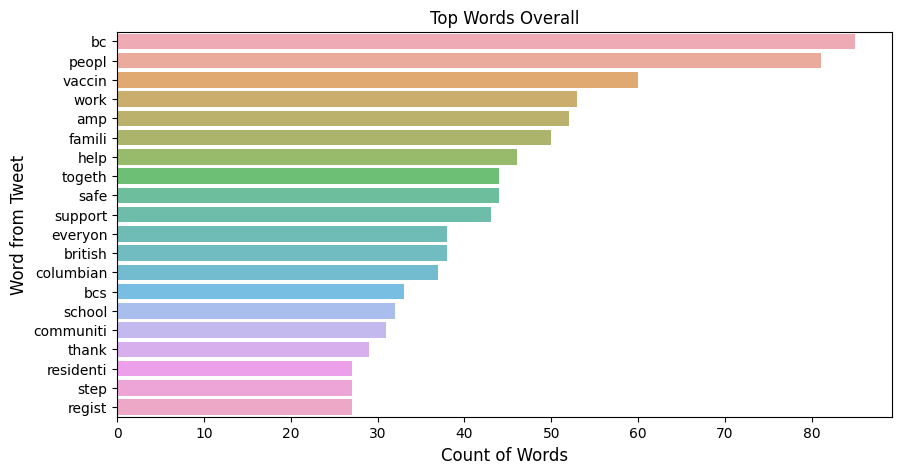

In [25]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [12]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [13]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [26]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


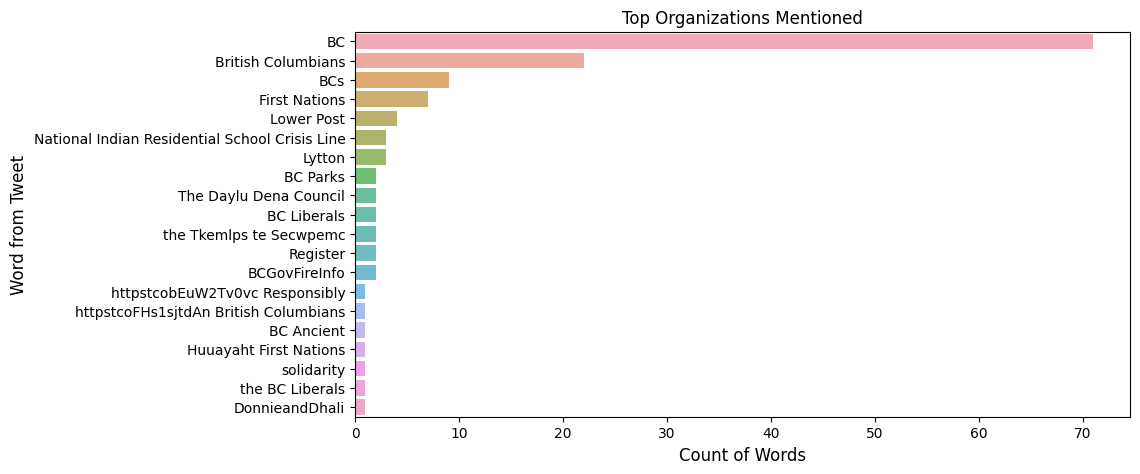

In [27]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [28]:
df.to_csv("horgan.csv")